Introduction
---
*BETA RELEASE: I should emphasize this project remains in the experimental stage and there are likely many tweaks to come that will improve/change outcomes. I do believe at this stage that the simulation provides good general insights regarding the relationship between various factors and viral spread.*

RKnot's purpose is two-fold:

1) Investigate the Herd Immunity Threshold (HIT) under Conditions of Heterogeneity
2) Investigate impacts of policy decisions on viral spread, hospital capacity, and death

[Standard models](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3782273/) of $R_0$ estimate HIT as:

\begin{equation}
HIT = 1 - 1/R_0 
\end{equation}

For a virus with $R_0$ of 2.5 ([as is estimated for sars-cov-2](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html)), this results in a HIT of 60%. 
Yet, measurements of seroprevalance of antibodies have suggested 15-20% peaks in some communities ([e.g. New York City](https://www.medrxiv.org/content/10.1101/2020.06.28.20142190v1)). 

*Is it possible that HIT is lower than* $R_0$ *would suggest?*

$R_0$ carries several basic assumptions that are not applicable to real world populations. The key assumption is homogeneity, meaning (among other things):

1. there is only one infected subject in a pool of susceptible subjects 
2. all subjects have the same number of contacts
3. each contact is equally likely to result in an infection, regardless of who, where, when, or how

#### Heterogeneity 
RKnot seeks to address the shortfalls in $R_0$ models by allowing the user to introduce customized, heterogeneous populations. Populations can have heterogeneity across several axis including:

+ *Fatality Rate*
+ *Population Density*
+ *Movement* - frequency and distance of location changes in space
+ *Susceptibility* - segments of population can be made immune (without requiring vaccination) to mimick phenomenon like [possible T-cell immunity](https://www.bmj.com/content/370/bmj.m3563).
+ *Transmission Factor,* $T$: RKnot (as with $R_0$) assumes that all contacts have the same likelihood of transmission, $\tau$. This is a homogenous assumption, however, RKnot introduces a unitless Transmission Factor, $T$, for each subject at each contact that can modulate $\tau$. This can be used to mimick social distancing or mask wearing or different socio-cultural norms that may impact spread (i.e. east Asian bows versus southern European double-kisses).

Future Additions:

+ *Infectiousness Curve* - $R_0$ models assume an infected subject is equally likely to transmit at any point during the infection, however, [research suggests](https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf) viral load and, thereby, likelihood of transmission follows a distribution curve. RKnot does *not currently support this feature*, however, it is being added.
+ *Isolation* - with the heightened awareness of a pandemic, individuals in population are more likely to self-isolate or quarantine themselves upon sympton onset, thereby helping to reduce spread.

Where RKnot seems to distinguish itself from prevailing models is that to affect the heterogeneity above, RKnot simulates *every contact of every subject in the population*.

In order to do that, RKnot must determine the $\tau$ for the space created by the user.

#### Approach

${R_0}$ is typically assessed at the population level and individual level ([and often those
assessments disagree](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1804098/)). The basic SIR model evaluates ${R_0}$ as:

$$
\begin{equation}
R_0=\beta*d
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\beta \textit{ = transmission rate, or number of secondary of infections per unit time}\\ d \textit{ = infectious period, or infectiousness duration per unit time}
\end{equation}
$$

This is often rewritten as:
$$
\begin{equation}
R_0=\beta/γ
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\gamma \textit{ = recovery rate}
\end{equation}
$$
[see R0 in Simple Models](https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf)

So, $R_0$ can be read as the fraction of new infections vs. recovering infections over the 
"life" of an infection.

Modeling on a per contact basis is hampered because $R_0$ models often 
average out contacts and focus more broadly on number of transmissions during 
the infectiousness period, assuming contacts average out among the population.

But in order to simulate every contact, we must know the probability of transmission for each contact, $\tau$. The transmission rate $\beta$ does imply a likelihood of infection, if the number of contacts is known and can be written as:

$$
\begin{equation}
\beta=\tau*c
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;\;\tau\textit{ = likelihood of infection during a contact}
\\\;\;\;\;\;\;\;\;c\textit{ = contacts / unit time,  (i.e. contact rate)}
\end{equation}
$$

Thus,

\begin{equation}
R_0=\tau*c*𝑑
\end{equation}

or 

\begin{equation}
R_0=\tau*c*1/\gamma
\end{equation}

[see equation 1 here](https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf)

For simulation purposes, we assume:

+ $R_0$ is known (from external analysis and provided by the user)
+ $\gamma$ is known (from external analysis and provided by the user)

Thus, unknowns are    $\tau$ & c

The simulation space, however, is given a number of parameters that allow us to estimate
the expected number of contacts. We know:

+ The population size
+ The number of locations
+ The movement patterns of subjects
+ The likelihood that a subject will be at a particular location at a particular time given 1/2/3 above
        
#### Expected Contacts 

$R_0$ assumes that an infected subject will have as many contacts with the population as any other subject. A simple method to estimate contacts for one infected subject is to, then, assume that each subject is equally likely to be in any one location at any time (in RKnot, this implemented by the `equal` mover function).

The probability of a single dot being in a singe location is:

$$
\begin{equation}
P(LOC_{xy},DOT_i)=1/N
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;xy\;\textit{= x/y coordinates of the location}
\\N\textit{ = number of locations}
\end{equation}
$$ 
 
The probability of another dot being there at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N*1/N
\end{equation}
$$

The probability of $n$ dots being at the same location at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N^n
\end{equation}
$$

Then, the number of ordered contacts is:

$$
\begin{equation}
\sum_{n=1}^N(1 / N^n)
\end{equation}
$$

And for all possible orders:

$$
\begin{equation}
\sum_{n=1}^N(1/N^n)*n
\end{equation}
$$

#### Likelihood of Transmission

With expected contact rate known, probability of transmission is found as:

\begin{equation}
\tau=R_0/(𝑑*c)
\end{equation}

or

\begin{equation}
\tau=R_0*γ/c  \;\;\;\;\;\textit{where}\;0<=\tau<=1
\end{equation}

Checking dimenions,

$$
\begin{equation}
=\frac{\text{infections}}{1}*\frac{1}{time}*\frac{time}{\text{number of contacts}}
=\frac{\text{infections}}{\text{number of contacts}}
\end{equation}
$$

This is the likelihood of transmission of a contact and is a fundamental factor used in the RKnot simulation. 

If a susceptible subject has contact with an infected, anywhere in the space, at any time,
its probability of infection is: 

$$
\begin{equation}
\tau
\end{equation}
$$

If a susceptible comes in contact with multiple infected at any time, its probability of
infection is:

$$
\begin{equation}
\tau^{1/n_{inf}}
\end{equation}
$$

This ensures that the likelihood of transmission is asymptotic to 1, as follows:

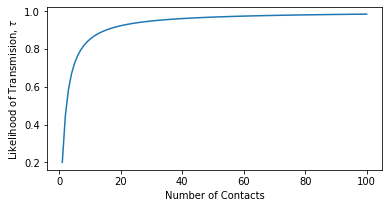

In [29]:
import numpy as np
import matplotlib.pyplot as plt

tmr = .2
xrng = np.arange(1, 100+1)
y = [tmr**(1/x) for x in xrng]
fig, ax = plt.subplots(figsize=(6,3))
plot = ax.plot(xrng, y)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel(r'Likelihood of Transmision, $\tau$')

plt.savefig('imgs/tau_v_contacts.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/tau_v_contacts.png" alt="Drawing" style="width: 400px;" align="center"/>


#### The Average Contact
Currently, RKnot assumes that each and every contact is an **Average Contact**. The Average Contact is a purely theoretical interaction that would result in about an average likelihood of transmission relative to all other possible interactions. The Average Contact is uninfluenced by external factors such as the demographics of the subjects, etc. Thus, the likelihood of transmission of an average contact is a fundamental property of the virus in question. And we would expect that viruses with a higher $R_0$ would have higher likelihood of transmission in an Average Contact.

I like to think of the Average Contact as two people on an elevator, standing two feet apart, having a conversation. This to me feels about average, or in the middle, of other contacts like, say, two people standing in a open field, 6 feet apart, having a conversation, or two people pressed right up against each other, by many other people, on the floor section of a concert.

***
#### References
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3782273/
+ https://www.bmj.com/content/370/bmj.m3563
+ https://www.medrxiv.org/content/10.1101/2020.06.28.20142190v1
+ https://fivethirtyeight.com/features/without-a-vaccine-herd-immunity-wont-save-us/
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3935673/
+ https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1804098/
+ https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf